# Lab - Logistic Regression

## Logistic Regression from scratch

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

Dataset **Titanic**

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv')

# Data manipulation
titanic.fillna(titanic['Age'].mean(), inplace=True)
titanic.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,FamilySize
0,0,3,0,22.0,2
1,1,1,1,38.0,2
2,1,3,1,26.0,1
3,1,1,1,35.0,2
4,0,3,0,35.0,1


In [3]:
from sklearn.model_selection import train_test_split

X = titanic[['Pclass', 'Sex', 'Age', 'FamilySize']].values
y = titanic[['Survived']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (712, 4) (712, 1)
Test set: (179, 4) (179, 1)


### Scikit-learn Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import log_loss

# Create Logistics Regression model from X and y
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)

# Show metrics
print("Accuracy score: %f" % accuracy_score(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Log loss:', log_loss(y_test, predictions)/len(y_test))

# Show parameters
print('w = ', lg.coef_)
print('b = ', lg.intercept_)

Accuracy score: 0.793296
Confusion Matrix:
[[97 17]
 [20 45]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.73      0.69      0.71        65

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

Log loss: 0.039884782615024775
w =  [[-1.18387774  2.56284417 -0.04074789 -0.21591208]]
b =  [2.84100084]


### Handmade Logistic Regression

**Forward Propagation:**
$$Z = Xw + b$$
$$\hat{y} = \sigma(Z) =\sigma(Xw + b) $$
$$J(w, b) = -\frac{1}{m}\sum_{i=1}^m{ \Big( y^{(i)} log( \hat{y}^{(i)}) + (1-y^{(i)}) log(1 - \hat{y}^{(i)}) \Big)} \tag{5}$$

**and Backward**

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X^T(\hat{y}-y)\tag{6}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})\tag{7}$$

In [5]:
# Initialize params
def initialize_params(X):
    '''Initialize w, b with zeros and return'''
    w = np.zeros((X.shape[1], 1))
    b = np.zeros((1, 1))
    return w, b

In [6]:
# Implement sigmoid
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

In [7]:
# Forward propagation
def forward(w, b, X):
    '''Return y_hat'''
    Z = np.dot(X, w) + b
    y_hat = sigmoid(Z)
    return y_hat

In [8]:
# Binary cross entropy loss
def binany_cross_entropy(y, y_hat):
    '''Calculate loss function J and return'''
    J = -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return J

In [9]:
# Backward propagation
def backward(X, y, y_hat, w, b):
    '''Calculate dw, db and return'''
    m = X.shape[0]
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y, keepdims=True)
    return dw, db

# Update parameters
def update_params(w, b, dw, db, learning_rate):
    '''Update w, b and return'''
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

In [10]:
# Training process
def train(X, y, iterations, learning_rate):
    '''Train w, b and return'''
    w, b = initialize_params(X)

    history = {'train_loss': np.array([]),
               'test_loss': np.array([]),
               'lr': np.array([])}

    for i in range(iterations):
        y_hat = forward(w, b, X)
        J = binany_cross_entropy(y, y_hat)
        history['train_loss'] = np.append(history['train_loss'], J)
        J_test = binany_cross_entropy(y_test, forward(w, b, X_test))
        history['test_loss'] = np.append(history['test_loss'], J_test)
        if i % 100 == 0:
            print(f'Step {i}: train_loss = {J}')
        dw, db = backward(X, y, y_hat, w, b)
        w, b = update_params(w, b, dw, db, learning_rate)
    return w, b, history

In [11]:
# Predict
def predict(w, b, X):
    '''Return predicted y of X'''
    y_hat = forward(w, b, X)
    return y_hat > 0.5

In [12]:
# Train the model and predict X_test
w, b, history = train(X_train, y_train, iterations=10000, learning_rate=5e-3)
predictions = predict(w, b, X_test)

Step 0: train_loss = 0.6931471805599453
Step 100: train_loss = 0.6468251630263747
Step 200: train_loss = 0.6326757129358916
Step 300: train_loss = 0.620992935723151
Step 400: train_loss = 0.6109658510132288
Step 500: train_loss = 0.602152147668363
Step 600: train_loss = 0.5942744614199724
Step 700: train_loss = 0.5871431335121196
Step 800: train_loss = 0.5806220436874141
Step 900: train_loss = 0.5746106860323436
Step 1000: train_loss = 0.5690333588537603
Step 1100: train_loss = 0.5638320514323742
Step 1200: train_loss = 0.5589615449002255
Step 1300: train_loss = 0.554385962345795
Step 1400: train_loss = 0.550076312149218
Step 1500: train_loss = 0.5460087270411389
Step 1600: train_loss = 0.5421631955903263
Step 1700: train_loss = 0.5385226441635325
Step 1800: train_loss = 0.535072269221707
Step 1900: train_loss = 0.5317990489438789
Step 2000: train_loss = 0.5286913836584277
Step 2100: train_loss = 0.5257388290480368
Step 2200: train_loss = 0.5229318963714717
Step 2300: train_loss = 0.52

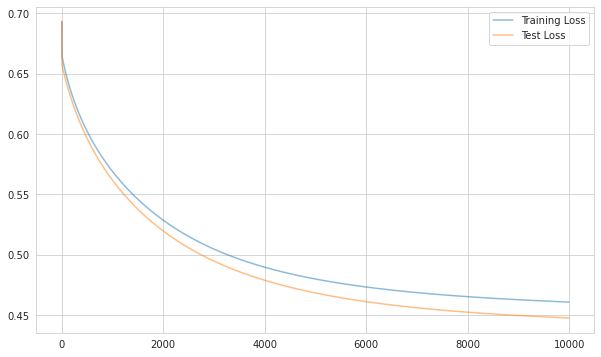

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss', alpha=0.5)
plt.plot(history['test_loss'], label='Test Loss', alpha=0.5)
# plt.xlim(0, 20000)
# plt.ylim(0.6, 0.8)
plt.legend()
plt.show()

**Evaluation**

In [14]:
# Evaluation
print("Accuracy score: %f" % accuracy_score(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Show parameters
print('w = ', lg.coef_)
print('b = ', lg.intercept_)

Accuracy score: 0.815642
Confusion Matrix:
[[101  13]
 [ 20  45]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.78      0.69      0.73        65

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

w =  [[-1.18387774  2.56284417 -0.04074789 -0.21591208]]
b =  [2.84100084]


In [15]:
# Output of sklearn.LogisticRegression
# Accuracy score: 0.793296
# Confusion Matrix:
# [[97 17]
#  [20 45]]
#               precision    recall  f1-score   support

#            0       0.83      0.85      0.84       114
#            1       0.73      0.69      0.71        65

#     accuracy                           0.79       179
#    macro avg       0.78      0.77      0.77       179
# weighted avg       0.79      0.79      0.79       179

# Log loss: 0.039884782615024775
# w =  [[-1.18387774  2.56284417 -0.04074789 -0.21591208]]
# b =  [2.84100084]

**Well done!**